In [6]:
import numpy as np
import pandas as pd

In [1]:
def backtest(df,side,period,exit_date):
    
    '''
    input
    -side: y_pred_buy_by_pcv or y_pred_sell_by_pcv
    -period: How many trading periods you hold a position
    -exit_date: buy_exit_date or sell_exit_date
    
    out
    -ret_realized_ind: A list containing the indicies where we could exit within a 
                      holding period
    '''
    ret_realized_ind=[]
    for n,(i,v) in enumerate(df[df[side] > 0][exit_date].iteritems()):
        
        if df[df[side] > 0].index[-2]==i:
            break

        elif df[df[side] > 0].index[n+period]>v:
            ret_realized_ind.append(i)
            
            
    return ret_realized_ind

In [4]:
df=pd.read_parquet('df_for_backtest')
df

"""
y_buy:Realized returns from a long position by a primary model
y_pred_buy_by_pcv:Predicted returns of a primary model by a ML model

"""

,buy_exit_date,y_pred_buy_by_pcv,y_buy
timestamp,,,
2021-02-23 05:50:00,2021-02-23 06:35:00,0.002672,0.010622
2021-02-23 06:20:00,2021-02-23 07:05:00,-0.001554,-0.012327
2021-02-23 06:35:00,2021-02-23 07:35:00,-0.002941,0.010303
2021-02-23 07:05:00,2021-02-23 07:35:00,-0.000994,0.000000
2021-02-23 07:35:00,2021-02-23 08:05:00,0.000015,-0.017285
...,...,...,...
2022-06-16 00:20:00,2022-06-16 00:35:00,0.001498,0.000000
2022-06-16 00:35:00,2022-06-16 01:05:00,0.001825,0.000000
2022-06-16 01:05:00,2022-06-16 01:20:00,-0.000897,0.000000


<AxesSubplot:xlabel='timestamp'>

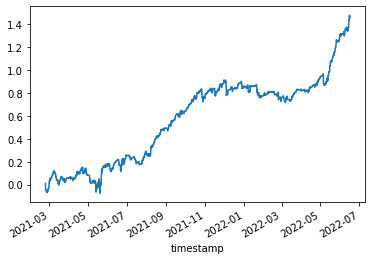

In [5]:
ret_realized_ind=backtest(df,side='y_pred_buy_by_pcv',period=2,exit_date='buy_exit_date')
df.loc[ret_realized_ind,'y_buy'].cumsum().plot()